In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-sales-dataset-of-45stores/walmart-sales-dataset-of-45stores.csv


* Store: Store Numbers ranging from 1 to 45
* Date: The Week of Sales. It is in the format of dd-mm-yyyy. The date starts from 05-02-2010
* Weekly_Sales: The sales of the given store in the given week
* Holiday_Flag: 1-The week has a Holiday 0-Fully working week
* Temperature: Temperature of the week of sales
* Fuel_Price: Price of the Fuel in the region of the given store
* Unemployment: Unemployment rate of the given store region
* CPI: Customer Price Index , the instrument to measure inflation. It is used to estimate the average variation between two given periods in the prices of products consumed by households.

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/walmart-sales-dataset-of-45stores/walmart-sales-dataset-of-45stores.csv', encoding = 'utf-8')
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
data = df.copy()

In [6]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
#changing datatype of Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [9]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,6435.0,23.0,1.0,12.0,23.0,34.0,45.0,12.988182
Date,6435,2011-06-17 00:00:00,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
Weekly_Sales,6435.0,1046964.877562,209986.25,553350.105,960746.04,1420158.66,3818686.45,564366.622054
Holiday_Flag,6435.0,0.06993,0.0,0.0,0.0,0.0,1.0,0.255049
Temperature,6435.0,60.663782,-2.06,47.46,62.67,74.94,100.14,18.444933
Fuel_Price,6435.0,3.358607,2.472,2.933,3.445,3.735,4.468,0.45902
CPI,6435.0,171.578394,126.064,131.735,182.616521,212.743293,227.232807,39.356712
Unemployment,6435.0,7.999151,3.879,6.891,7.874,8.622,14.313,1.875885


<Axes: >

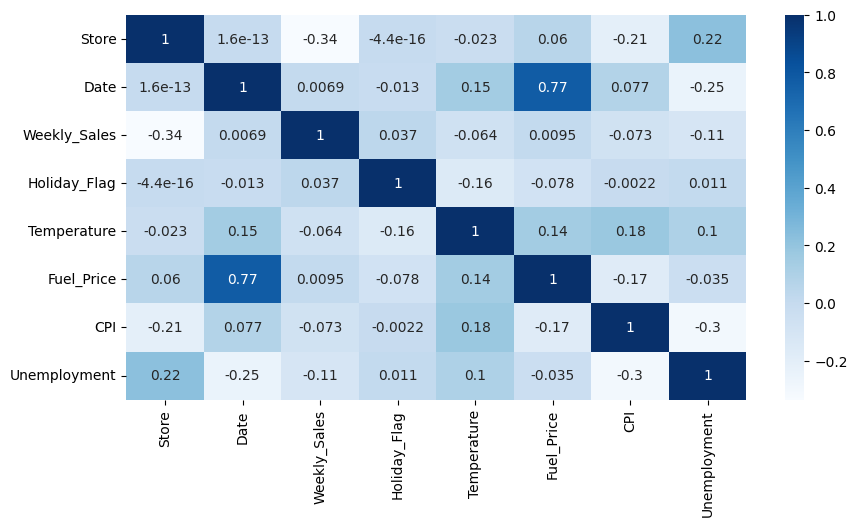

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")

Store              Axes(0.125,0.712609;0.168478x0.167391)
Weekly_Sales    Axes(0.327174,0.712609;0.168478x0.167391)
Holiday_Flag    Axes(0.529348,0.712609;0.168478x0.167391)
Temperature     Axes(0.731522,0.712609;0.168478x0.167391)
Fuel_Price         Axes(0.125,0.511739;0.168478x0.167391)
CPI             Axes(0.327174,0.511739;0.168478x0.167391)
Unemployment    Axes(0.529348,0.511739;0.168478x0.167391)
dtype: object

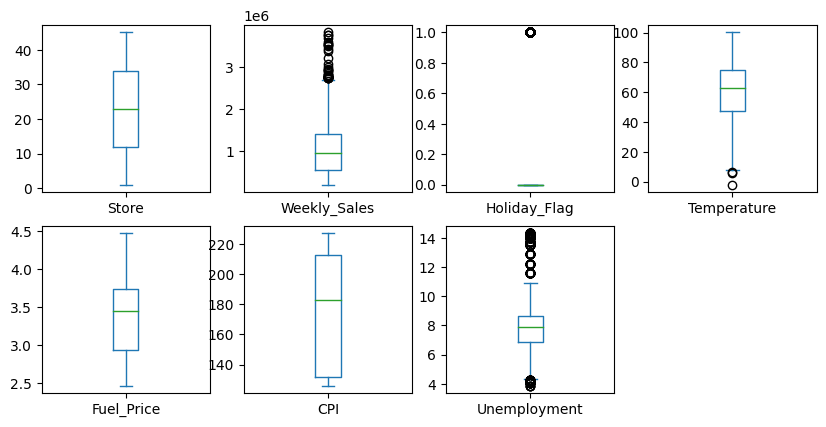

In [11]:
df.plot(kind='box', subplots = True, figsize = (10,10), layout = (4,4))

In [12]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day

### Weekly sales

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

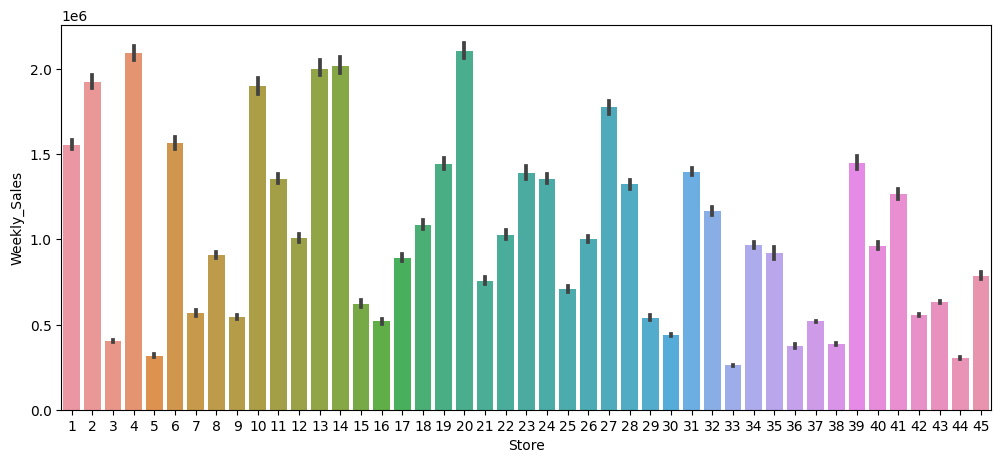

In [13]:
#weekly_sales with respect to store
plt.figure(figsize = (12,5))
sns.barplot(df, x='Store', y='Weekly_Sales')

#### ***Store 4 and 20 have the highest weekly sales, followed by stores 14, 13, and 2. Meanwhile, Weekly sales are the lowest in stores 33, 44, and 5***

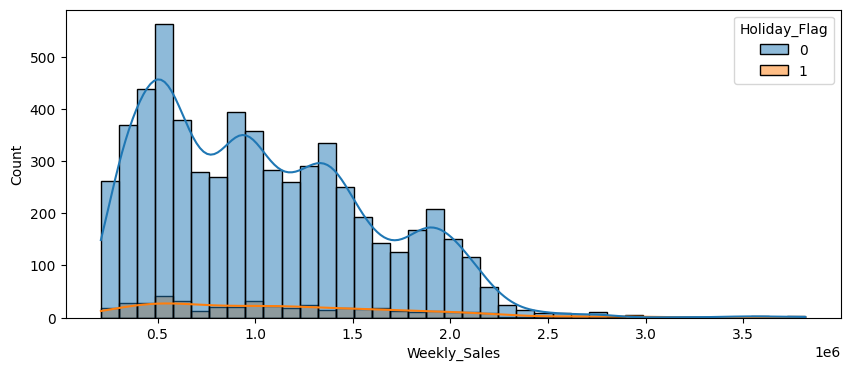

In [14]:
#weekly sales with respect to holidays
fig, ax = plt.subplots(figsize=(10,4))
sns.histplot(df, x='Weekly_Sales', hue='Holiday_Flag', kde=True)
plt.show()

<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

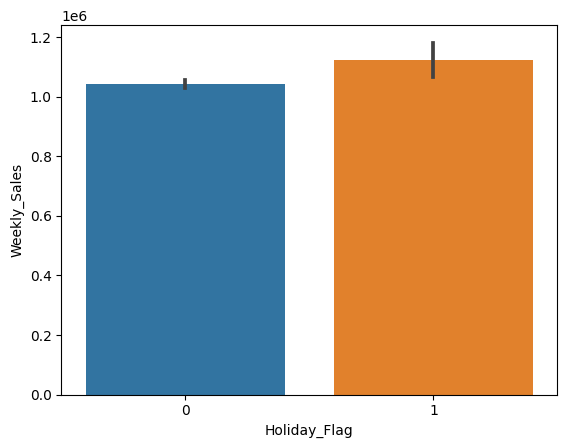

In [15]:
sns.barplot(df, x='Holiday_Flag', y='Weekly_Sales')

#### ***weekly Sales reach their max on holiday flags***

<Axes: xlabel='Date'>

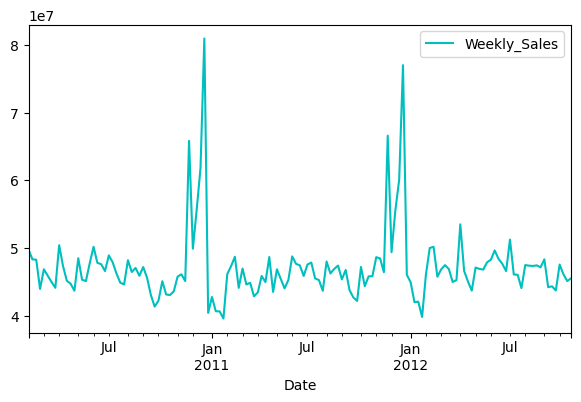

In [16]:
#sum of sales per week
df.groupby('Date')[['Weekly_Sales']].sum().plot(color= 'c', figsize= (7,4))

#### ***Weekly sales are much more higher just before Christmas, and during black fridays***

<Axes: xlabel='Year'>

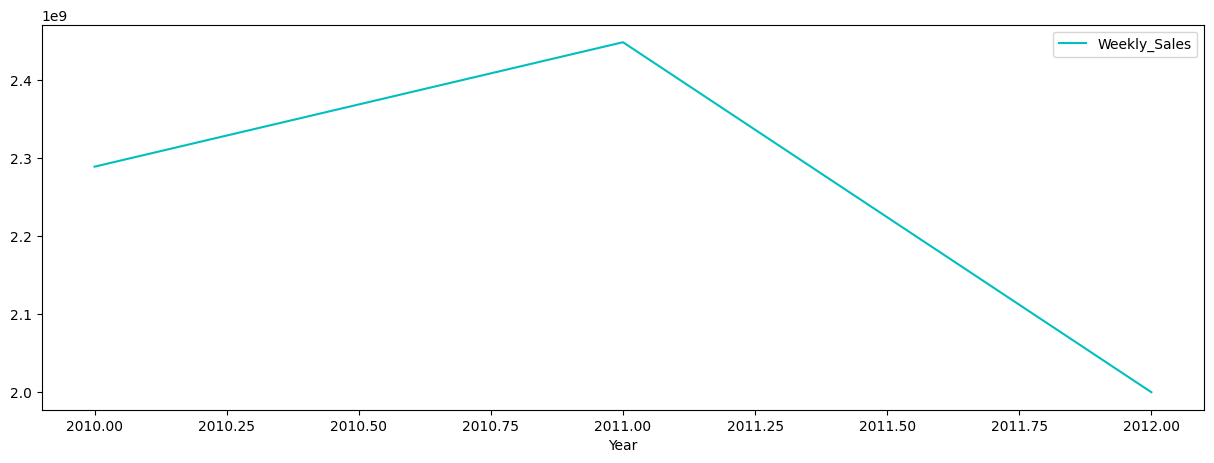

In [17]:
#weekly sales over the year
df.groupby(['Year'])[['Weekly_Sales']].sum().plot(c='c',figsize=(15,5))

#### ***2011 owns the highest weekly sales, meanwhile 2012 has the lowest weekly sales***

<Axes: xlabel='Month'>

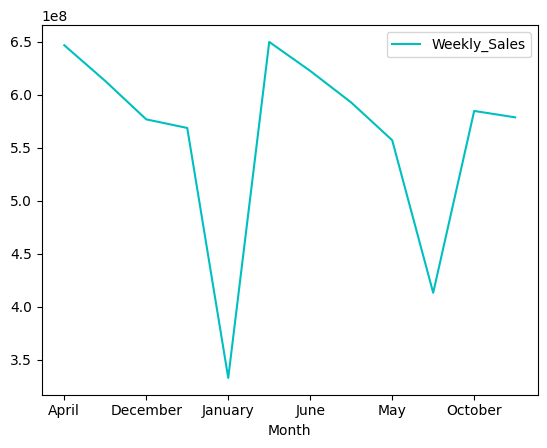

In [18]:
df.groupby(['Month'])[['Weekly_Sales']].sum().plot(c='c')

<Axes: xlabel='Day'>

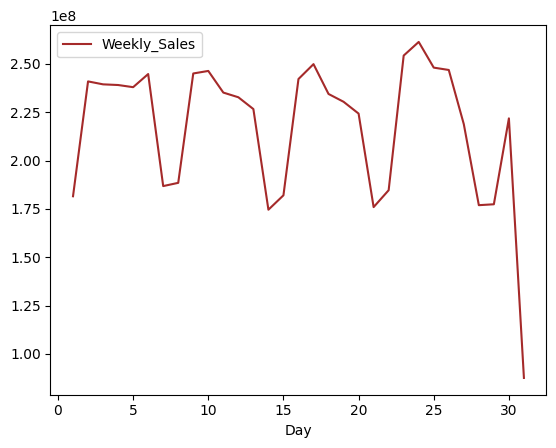

In [19]:
df.groupby(['Day'])[['Weekly_Sales']].sum().plot(c='brown')

### Temperature

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


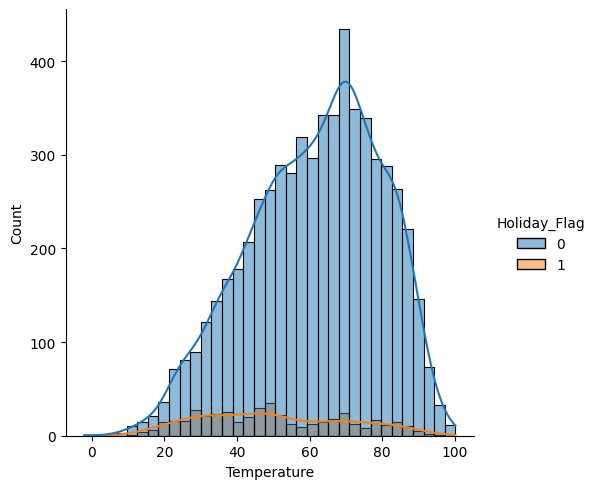

In [20]:
sns.displot(df, x='Temperature', hue='Holiday_Flag',kde=True)

Text(0, 0.5, 'Weekly_Sales')

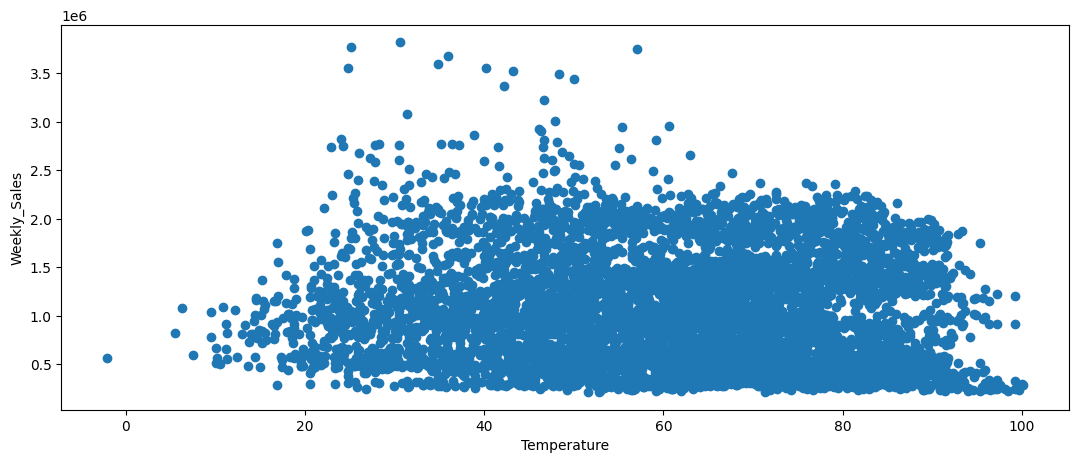

In [21]:
#weekly sales and Temperature
plt.figure(figsize = (13,5))
plt.scatter(df['Temperature'], df['Weekly_Sales'])
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')

#### ***weekly sales reach their max between 60 and 80 fahernheit***

<Axes: xlabel='Date'>

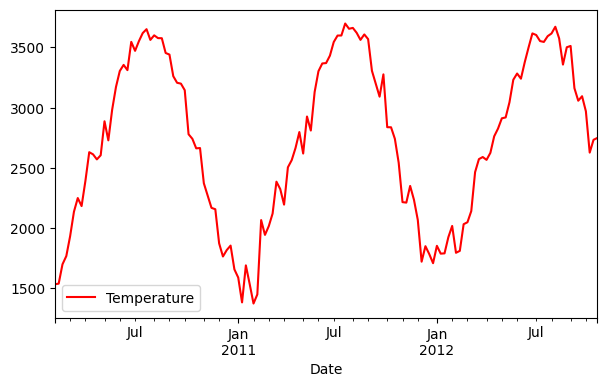

In [22]:
#temperature with date
df.groupby('Date')[['Temperature']].sum().plot(c='r', figsize=(7,4))

#### ***for the three years, temperature reach its highest values in July and August, and reach their lowest values in january and february, however.***

<Axes: xlabel='Year'>

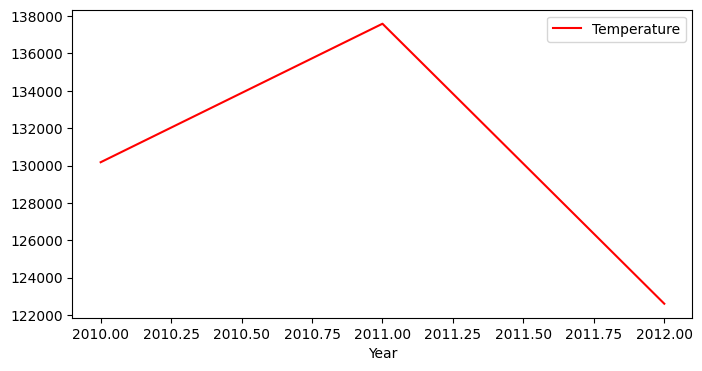

In [23]:
#temperature over the Year
df.groupby('Year')[['Temperature']].sum().plot(c='r', figsize=(8,4))

<Axes: xlabel='Month'>

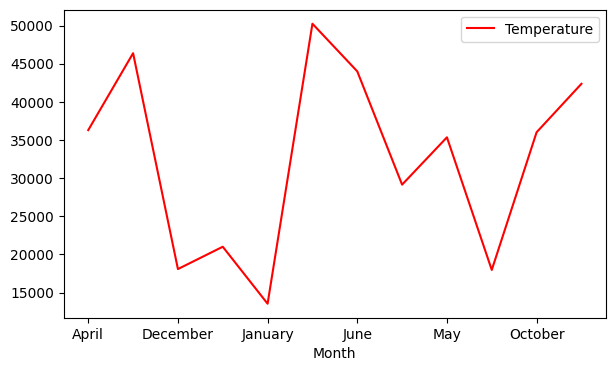

In [24]:
#temperature over the Month
df.groupby('Month')[['Temperature']].sum().plot(c='r', figsize=(7,4))

#### ***Temperature's peak is in July***

### *Fuel Price*

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


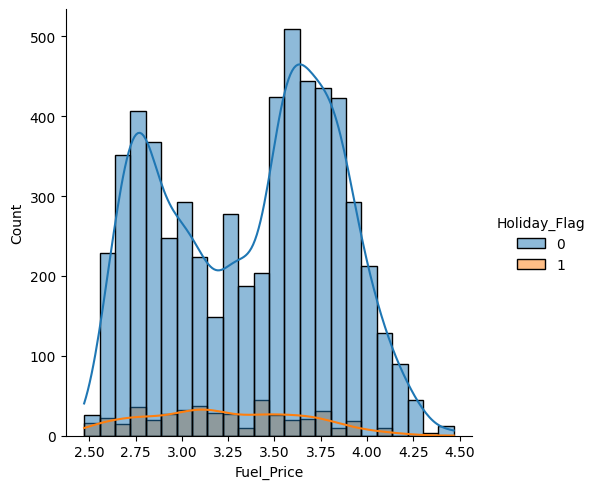

In [25]:
sns.displot(df, x='Fuel_Price', hue='Holiday_Flag',kde=True)

<Axes: xlabel='Fuel_Price'>

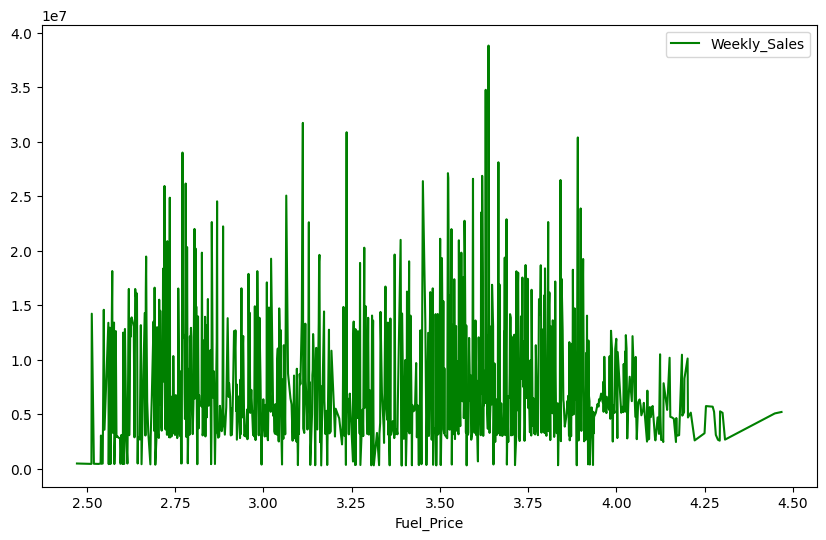

In [26]:
#fuel price and weekly sales
df.groupby('Fuel_Price')[['Weekly_Sales']].sum().plot(color= 'g', figsize= (10,6))

#### ***fuel prices between 3.5 and 3.75 have the most weekly sales***

<Axes: xlabel='Date'>

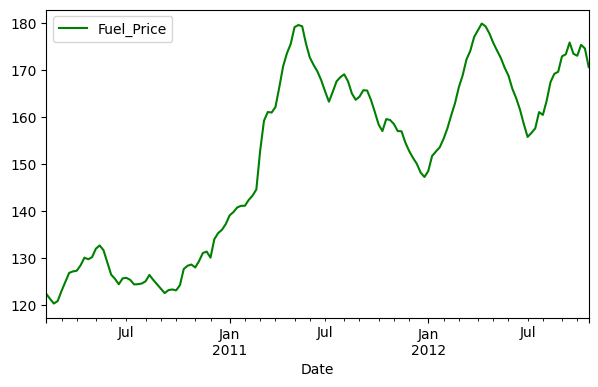

In [27]:
#sum fuel price
df.groupby('Date')[['Fuel_Price']].sum().plot(color='g', figsize=(7,4))

#### ***fuel prices experienced a rapid increase from Dec 2010 and continue to increase despite their decreasing in the winter of 2012***

<Axes: xlabel='Year'>

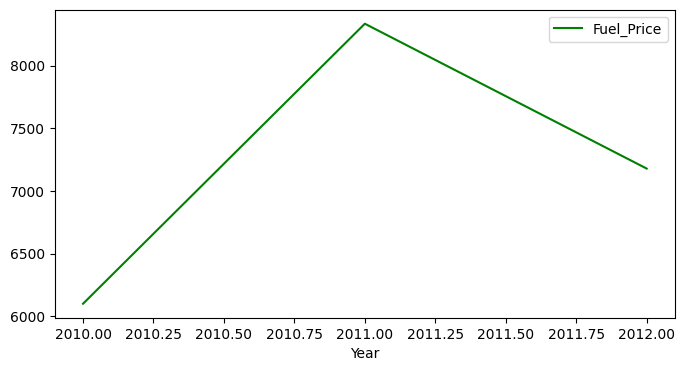

In [28]:
df.groupby(['Year'])[['Fuel_Price']].sum().plot(c='g', figsize=(8,4))

#### ***fuel prices were at their peak in 2011***

<Axes: xlabel='Month'>

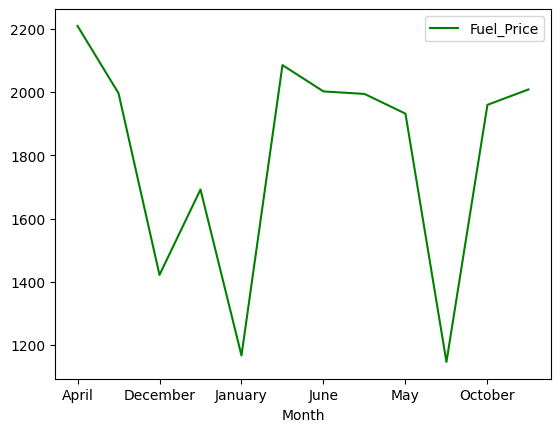

In [29]:
df.groupby(['Month'])[['Fuel_Price']].sum().plot(c='g')

#### ***The graph shows that in week 4 fuel prices reaches their max***

<Axes: xlabel='Day'>

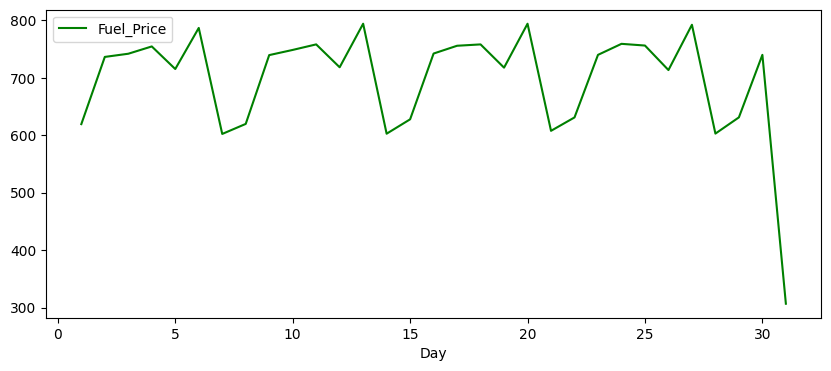

In [30]:
df.groupby(['Day'])[['Fuel_Price']].sum().plot(c='g', figsize=(10,4))

### *CPI*

<Axes: xlabel='CPI', ylabel='Weekly_Sales'>

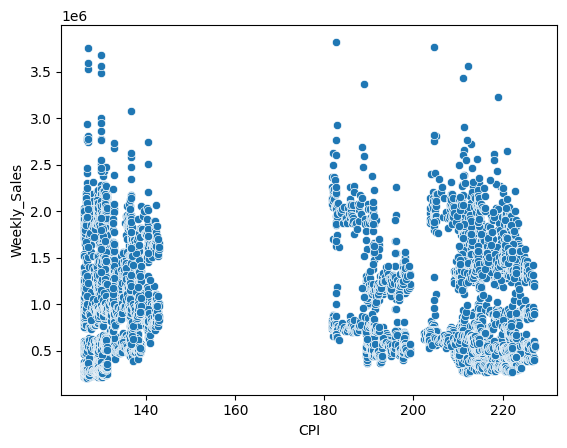

In [31]:
sns.scatterplot(df, x='CPI', y='Weekly_Sales')

#### ***around 140 and less and in the range of 220, CPI are much more higher***

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


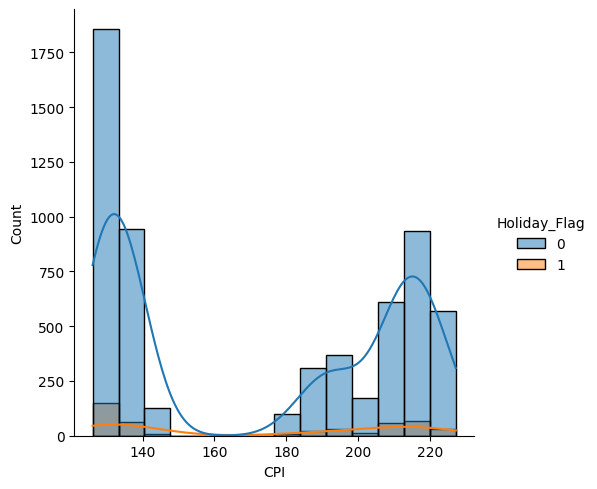

In [32]:
sns.displot(df, x='CPI', hue='Holiday_Flag',kde=True)

<Axes: xlabel='Date'>

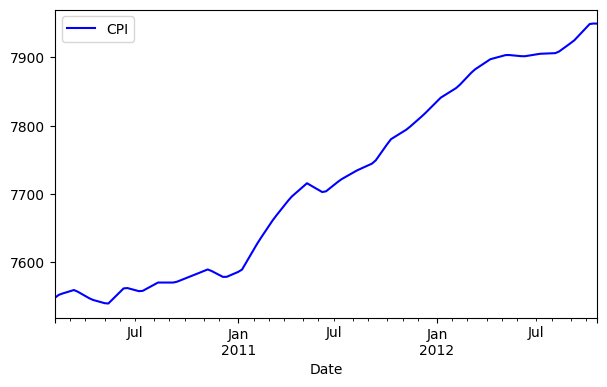

In [33]:
df.groupby('Date')[['CPI']].sum().plot(color='b', figsize=(7,4))

#### ***CPI experienced high increase from winter 2011 and continue to increase, due to increasing of fuel prices in the same period***

<Axes: xlabel='Year'>

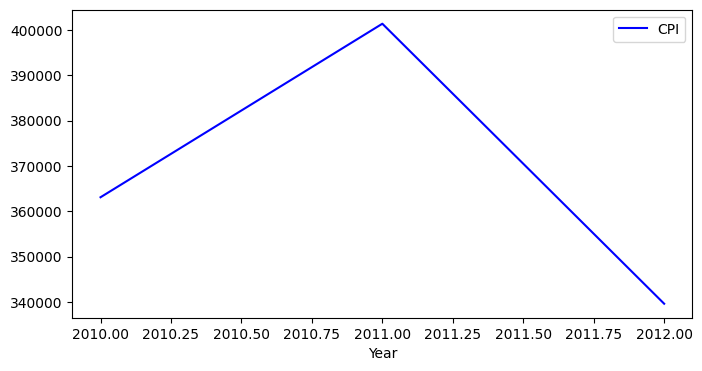

In [34]:
df.groupby('Year')[['CPI']].sum().plot(color='b', figsize=(8,4))

<Axes: xlabel='Month'>

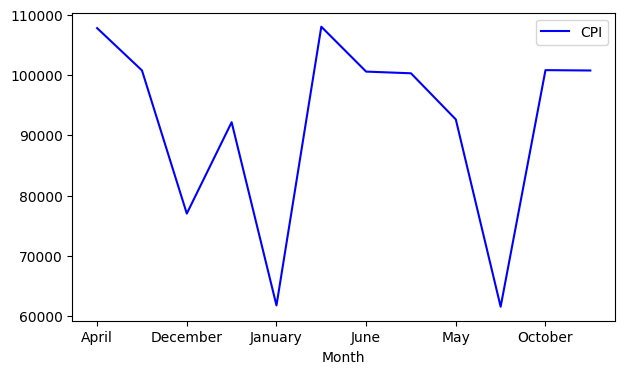

In [35]:
df.groupby('Month')[['CPI']].sum().plot(color='b', figsize=(7,4))

<Axes: xlabel='Day'>

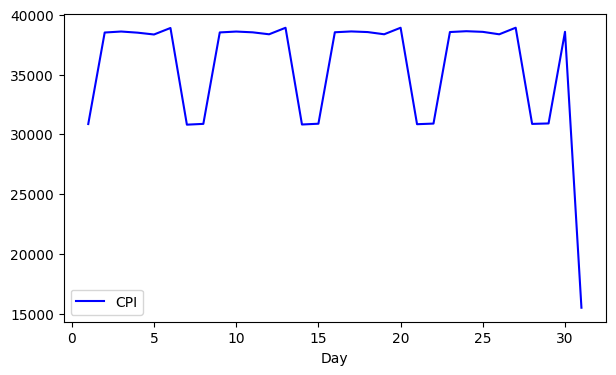

In [36]:
df.groupby('Day')[['CPI']].sum().plot(color='b', figsize=(7,4))

<Axes: xlabel='Store', ylabel='CPI'>

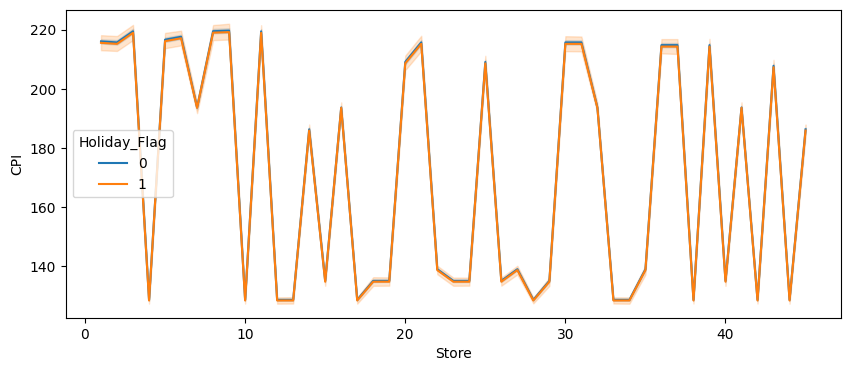

In [37]:
#What is the ratio between store and cpi with holiday ?
plt.figure(figsize = (10,4))
sns.lineplot(df, x='Store', y='CPI', hue='Holiday_Flag')

### *Unemployment*

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


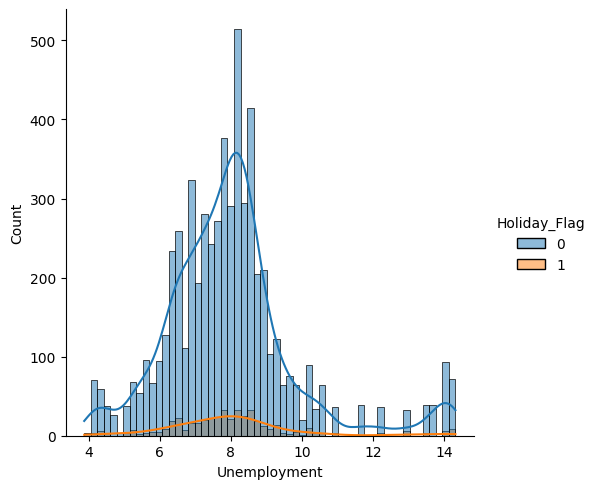

In [38]:
sns.displot(df, x='Unemployment', hue='Holiday_Flag',kde=True)

<Axes: xlabel='Date'>

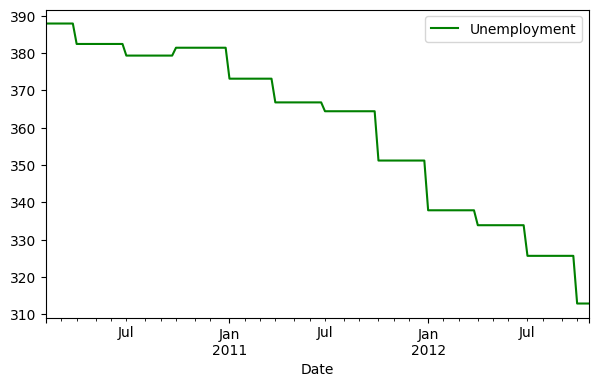

In [39]:
#unemployment with date
df.groupby('Date')[['Unemployment']].sum().plot(c='g',figsize=(7,4))

#### ***unemployment rate continues to decrease at a good rate***

<Axes: xlabel='Store', ylabel='Unemployment'>

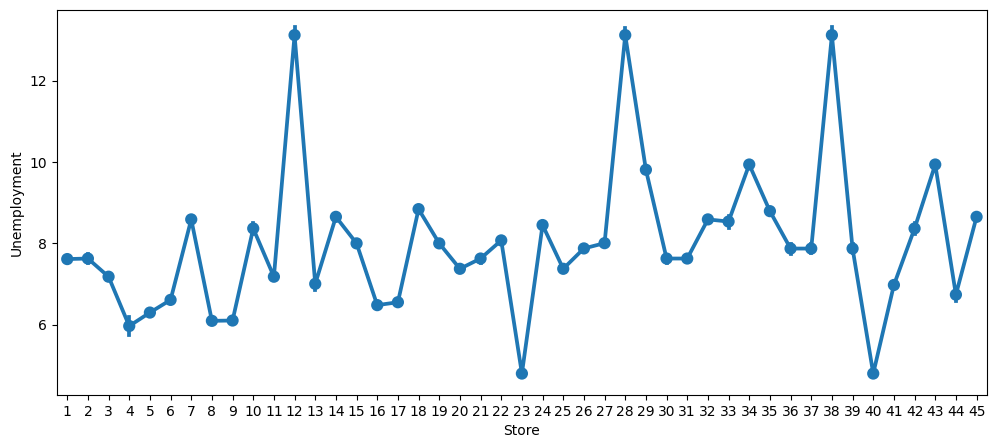

In [40]:
#what is the relation between Store and unemployment ?
plt.figure(figsize = (12,5))
sns.pointplot(df, x='Store', y='Unemployment')

#### ***Stores 12, 28 and 38 have the highest unemployment rate, on the otherhand, stores 23 and 40 have the lowest rate***

In [41]:
df1 = df.groupby('Year')['Month'].value_counts().unstack().fillna(0).T
df1

Year,2010,2011,2012
Month,,,
April,225.0,225.0,180.0
August,180.0,180.0,225.0
December,225.0,225.0,0.0
February,180.0,180.0,180.0
January,0.0,180.0,180.0
July,225.0,225.0,180.0
June,180.0,180.0,225.0
March,180.0,180.0,225.0
May,180.0,180.0,180.0


Text(0.5, 1.0, 'sales per month and year')

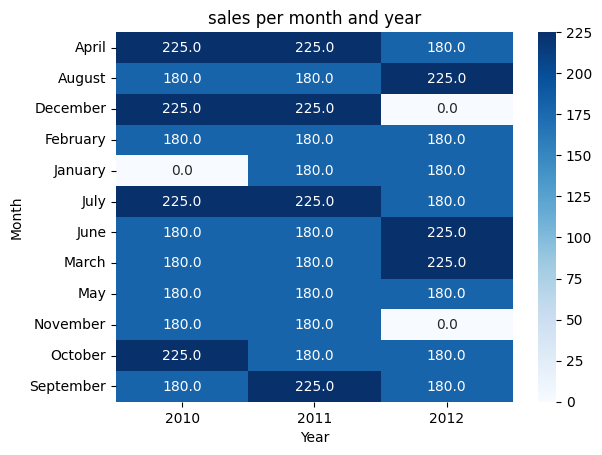

In [42]:
sns.heatmap(df1 , cmap = "Blues" ,annot=True,fmt='.1f')
plt.title("sales per month and year")

#### ***weekly sales are higher on summer and fests and reach the highest rates during the period between black friday and christmas***

In [43]:
!pip install calmap

(<Figure size 800x500 with 3 Axes>,
 array([<Axes: ylabel='2010'>, <Axes: ylabel='2011'>,
        <Axes: ylabel='2012'>], dtype=object))

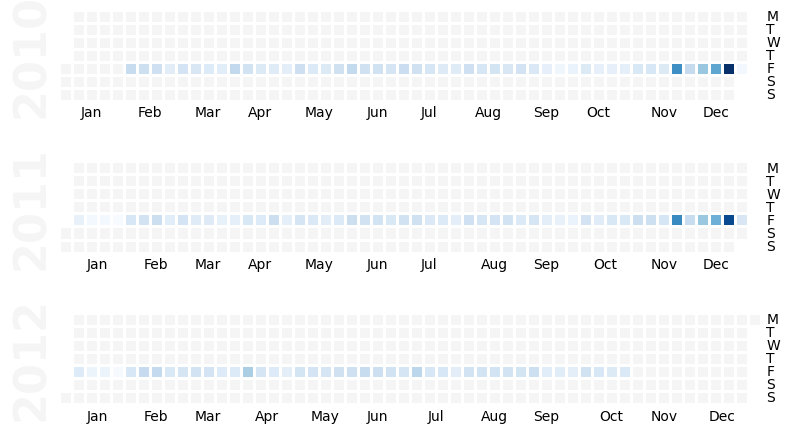

In [44]:
import calmap
sales=df.groupby('Date')[['Weekly_Sales']].sum()
calmap.calendarplot(sales, daylabels='MTWTFSS', cmap='Blues', fig_kws=dict(figsize=(8, 5)))

#### ***weekly sales are higher on weekends and reach the highest rates during the period between black friday and christmas***

## Resampling

In [45]:
weekly_date = (sales.resample("1W").sum())
weekly_date

,Weekly_Sales
Date,
2010-02-07,49750740.50
2010-02-14,48336677.63
2010-02-21,48276993.78
2010-02-28,43968571.13
2010-03-07,46871470.30
...,...
2012-09-30,43734899.40
2012-10-07,47566639.31
2012-10-14,46128514.25


<Axes: xlabel='Date'>

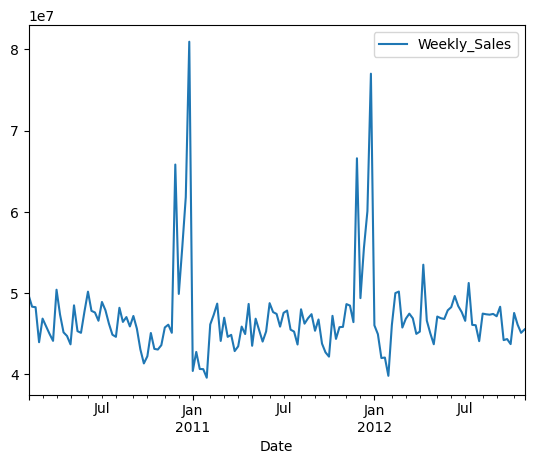

In [46]:
weekly_date.plot()

In [47]:
df_monthly = (sales.resample("1m").sum())
df_monthly

,Weekly_Sales
Date,
2010-02-28,1.903330e+08
2010-03-31,1.819198e+08
2010-04-30,2.314124e+08
2010-05-31,1.867109e+08
2010-06-30,1.922462e+08
2010-07-31,2.325801e+08
2010-08-31,1.876401e+08
2010-09-30,1.772679e+08
2010-10-31,2.171618e+08


<Axes: xlabel='Date'>

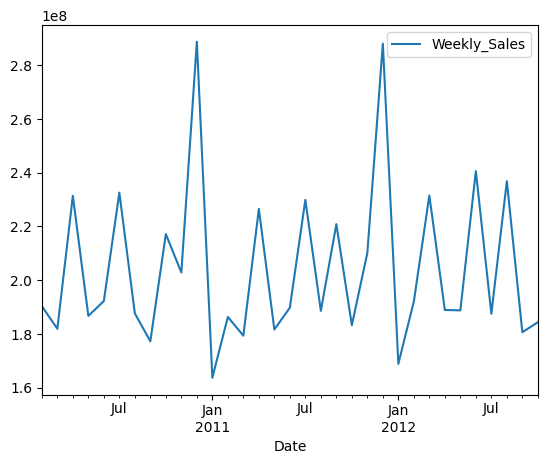

In [48]:
df_monthly.plot()

<Axes: >

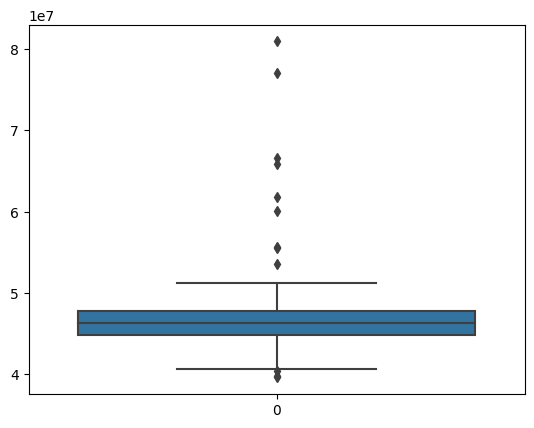

In [49]:
sns.boxplot(weekly_date['Weekly_Sales'])

## Modeling

In [50]:
df_weekly_new = weekly_date.copy()
df_weekly_new.shape

(143, 1)

In [51]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
import matplotlib.pyplot as plt
plt.figure #to solve error of pt has no attribute figure
import seaborn as sns
import plotly.express as px
##%matplotlib inline 


import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 6
from statsmodels.graphics.tsaplots import plot_predict
from sklearn import metrics 

In [52]:
def ACF_and_PACF(data):
    fig = plt.figure(figsize=  (10,6))
    ax1 = fig.add_subplot(211)
    fig = plot_acf(data , lags = 15 , ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = plot_pacf(data , lags = 15 , ax=ax2)

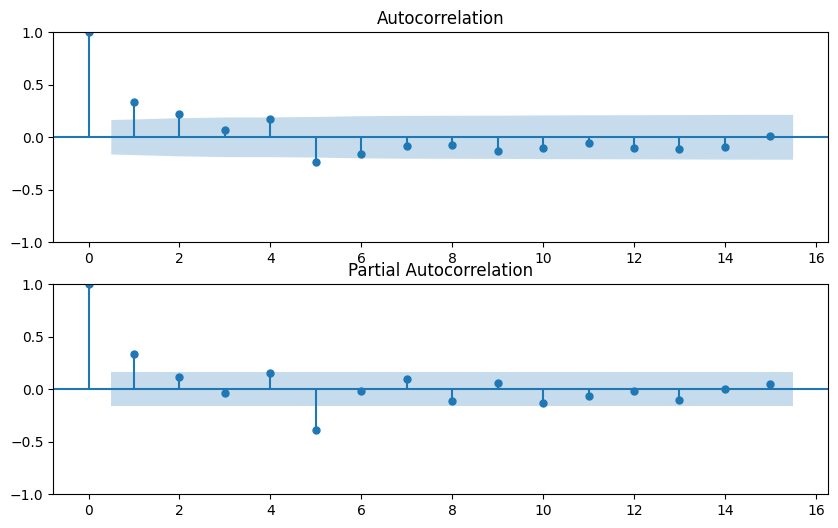

In [53]:
ACF_and_PACF(df_weekly_new['Weekly_Sales'])

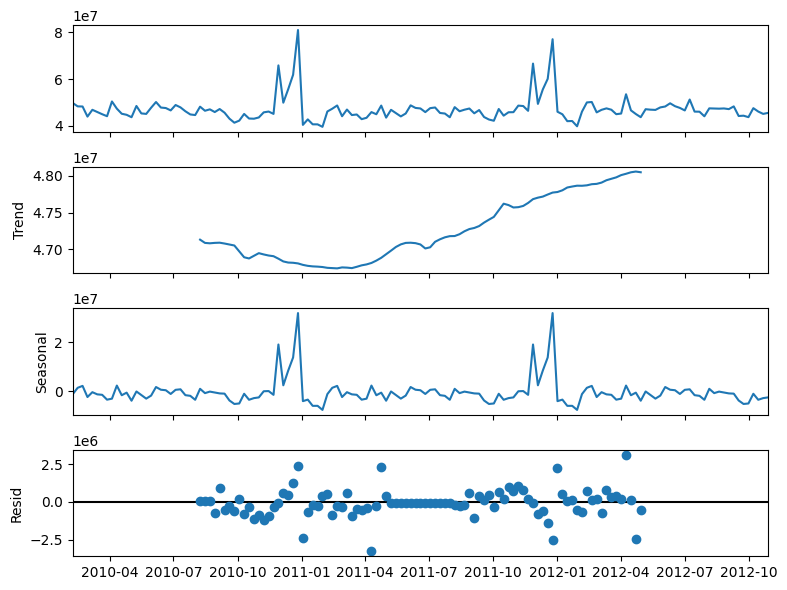

In [54]:
decomposition = sm.tsa.seasonal_decompose (df_weekly_new , model = 'additive')
decomposition.plot()
plt.show()

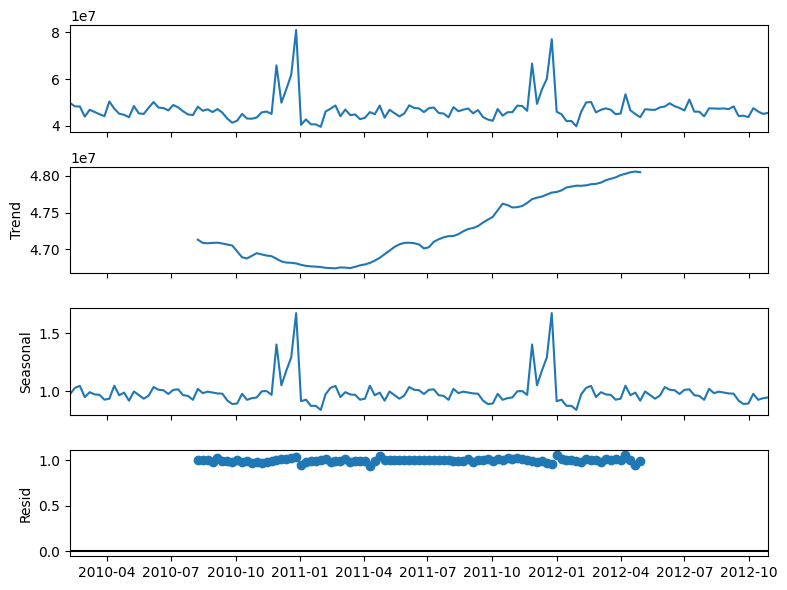

In [55]:
decomposition = sm.tsa.seasonal_decompose (df_weekly_new , model ='multiplicative' )
decomposition.plot()
plt.show()

### Tests to check if data is stationary or not

In [56]:
rolmean = df_weekly_new.rolling(window=4).mean()
rolstd = df_weekly_new.rolling(window=4).std()
print (rolmean , rolstd)

            Weekly_Sales
Date                    
2010-02-07           NaN
2010-02-14           NaN
2010-02-21           NaN
2010-02-28  4.758325e+07
2010-03-07  4.686343e+07
...                  ...
2012-09-30  4.516139e+07
2012-10-07  4.497053e+07
2012-10-14  4.544615e+07
2012-10-21  4.563812e+07
2012-10-28  4.609042e+07

[143 rows x 1 columns]             Weekly_Sales
Date                    
2010-02-07           NaN
2010-02-14           NaN
2010-02-21           NaN
2010-02-28  2.504187e+06
2010-03-07  2.045230e+06
...                  ...
2012-09-30  2.129258e+06
2012-10-07  1.751216e+06
2012-10-14  1.739930e+06
2012-10-21  1.617393e+06
2012-10-28  1.067109e+06

[143 rows x 1 columns]


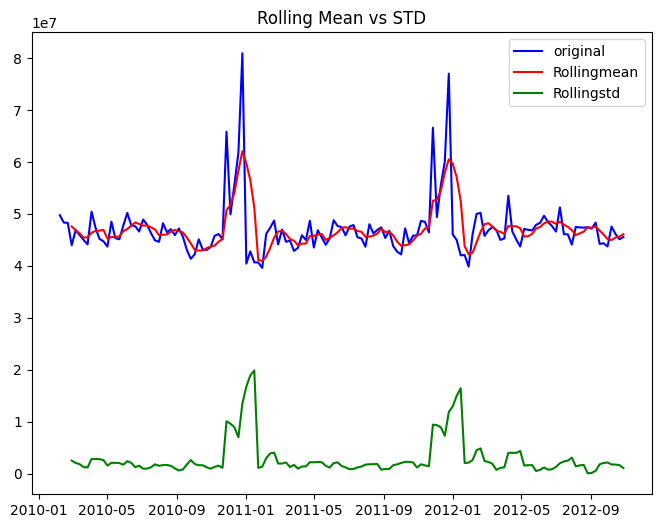

In [57]:
orig = plt.plot(df_weekly_new , color = "blue" , label = "original")
mean = plt.plot(rolmean , color = "red" , label = "Rollingmean")
std = plt.plot(rolstd , color = "green" , label = "Rollingstd")
plt.legend(loc = 'best')
plt.title("Rolling Mean vs STD")
plt.show()

In [58]:
#2)Dickey Fuller Test
dftest = adfuller(df_weekly_new['Weekly_Sales'] , autolag= "AIC")

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

##P-Value > 5% then data is Non stationarity

Test Statistic                -5.908298e+00
p-value                        2.675979e-07
Lags Used                      4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64


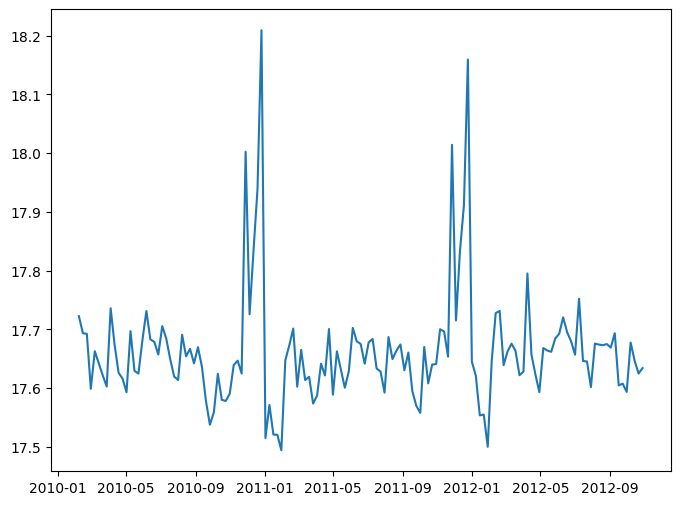

In [59]:
df_logScale = np.log(df_weekly_new)
plt.plot(df_logScale)

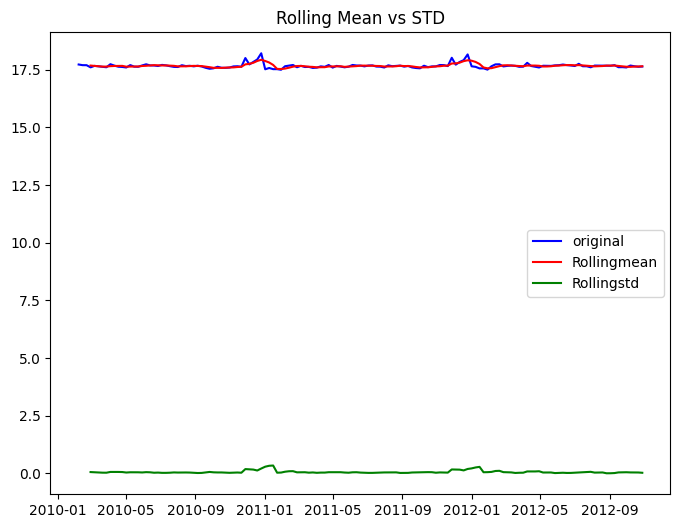

In [60]:
rolmean = df_logScale.rolling(window=4).mean()
rolstd = df_logScale.rolling(window=4).std()

orig = plt.plot(df_logScale , color = "blue" , label = "original")
mean = plt.plot(rolmean , color = "red" , label = "Rollingmean")
std = plt.plot(rolstd , color = "green" , label = "Rollingstd")
plt.legend(loc = 'best')
plt.title("Rolling Mean vs STD")
plt.show()

In [61]:
#2)Dickey Fuller Test
dftest = adfuller(df_logScale['Weekly_Sales'] , autolag= "AIC")

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

##P-Value > 5% then data is Non stationarity

Test Statistic                -6.332826e+00
p-value                        2.878283e-08
Lags Used                      4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64


In [62]:
datasetLogScaleMinusMrolling = df_logScale - rolmean
datasetLogScaleMinusMrolling.head(12)

#Remove NAN values
datasetLogScaleMinusMrolling.dropna(inplace=True)
datasetLogScaleMinusMrolling.head(10)

,Weekly_Sales
Date,
2010-02-28,-0.077936
2010-03-07,0.000902
2010-03-14,-0.006696
2010-03-21,-0.009663
2010-03-28,-0.029789
2010-04-04,0.085182
2010-04-11,0.014890
2010-04-18,-0.033344
2010-04-25,-0.046714


<Axes: xlabel='Date'>

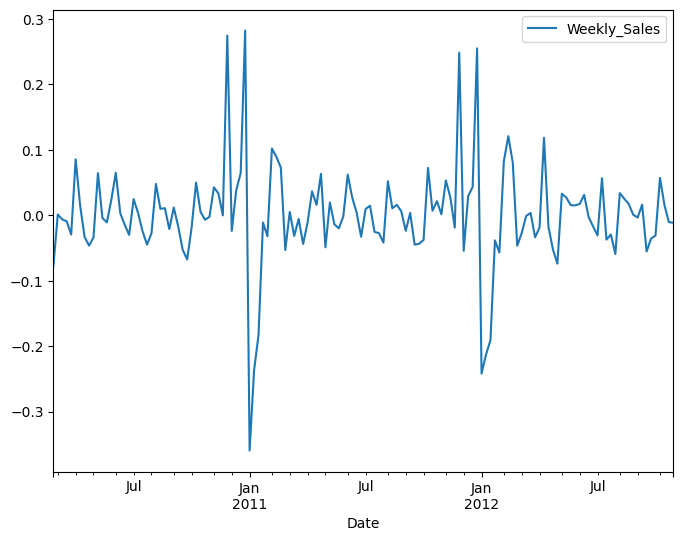

In [63]:
datasetLogScaleMinusMrolling.plot()

In [64]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=4).mean()
    movingSTD = timeseries.rolling(window=4).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Weekly_Sales'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

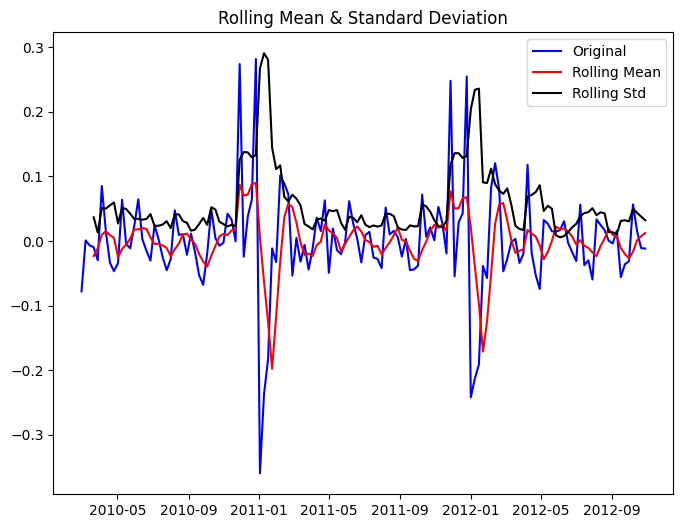

Results of Dickey Fuller Test:
Test Statistic                -6.052235e+00
p-value                        1.269473e-07
Lags Used                      7.000000e+00
Number of Observations Used    1.320000e+02
Critical Value (1%)           -3.480888e+00
Critical Value (5%)           -2.883697e+00
Critical Value (10%)          -2.578586e+00
dtype: float64


In [65]:
test_stationarity(datasetLogScaleMinusMrolling)

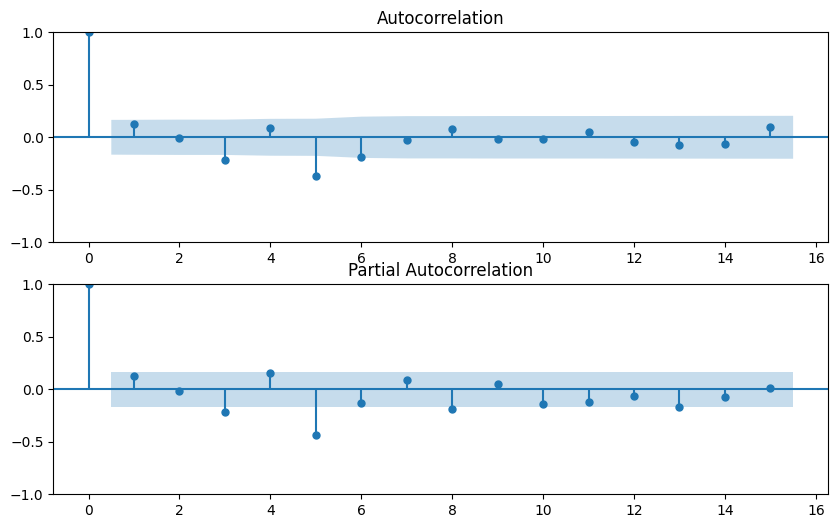

In [66]:
ACF_and_PACF(datasetLogScaleMinusMrolling['Weekly_Sales'])

In [67]:
df_mod = datasetLogScaleMinusMrolling.dropna()
df_mod = pd.DataFrame(df_mod)
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140 entries, 2010-02-28 to 2012-10-28
Freq: W-SUN
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  140 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [68]:
df_weekly_new.shape

(143, 1)

In [69]:
y_train = df_weekly_new[0:100]
y_test = df_weekly_new[100:143]

In [70]:
y_train

,Weekly_Sales
Date,
2010-02-07,49750740.50
2010-02-14,48336677.63
2010-02-21,48276993.78
2010-02-28,43968571.13
2010-03-07,46871470.30
...,...
2011-12-04,49390556.49
2011-12-11,55561147.70
2011-12-18,60085695.94


In [71]:
y_test

,Weekly_Sales
Date,
2012-01-08,44955421.95
2012-01-15,42023078.48
2012-01-22,42080996.56
2012-01-29,39834974.67
2012-02-05,46085608.09
2012-02-12,50009407.92
2012-02-19,50197056.96
2012-02-26,45771506.57
2012-03-04,46861034.97


In [72]:
from statsmodels.tsa.arima_model import ARIMA

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  100
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1690.717
Date:                Fri, 08 Sep 2023   AIC                           3391.435
Time:                        15:40:06   BIC                           3404.410
Sample:                    02-07-2010   HQIC                          3396.685
                         - 01-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3047      0.342     -0.891      0.373      -0.975       0.365
ar.L2          0.4593      0.158      2.902      0.004       0.149       0.769
ma.L1         -0.1922      0.341     -0.564      0.5

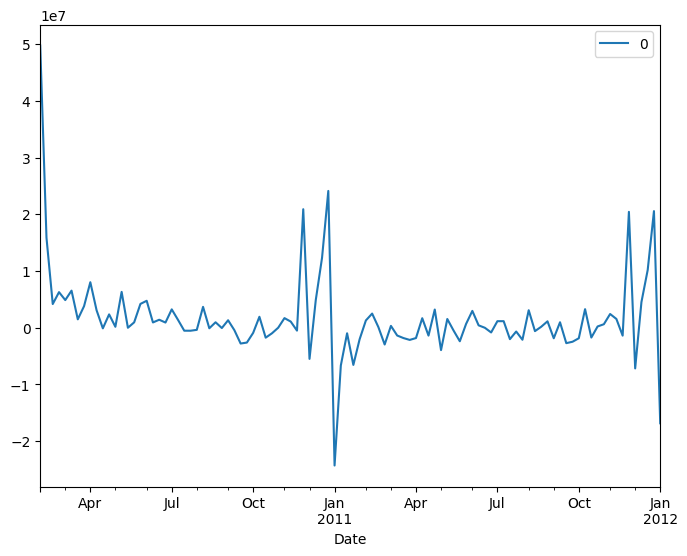

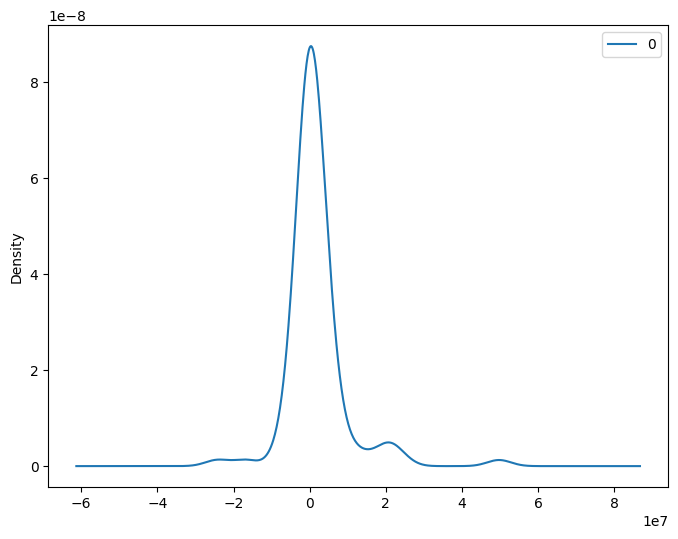

                  0
count  1.000000e+02
mean   1.718782e+06
std    7.879664e+06
min   -2.428163e+07
25%   -1.369399e+06
50%    5.256160e+05
75%    3.002458e+06
max    4.975074e+07


In [73]:
model = sm.tsa.arima.ARIMA(y_train , order = (2,1,2))
model1 = model.fit()
print(model1.summary())

res = pd.DataFrame(model1.resid)
res.plot()
plt.show()

res.plot(kind = 'kde')
plt.show()
print(res.describe())

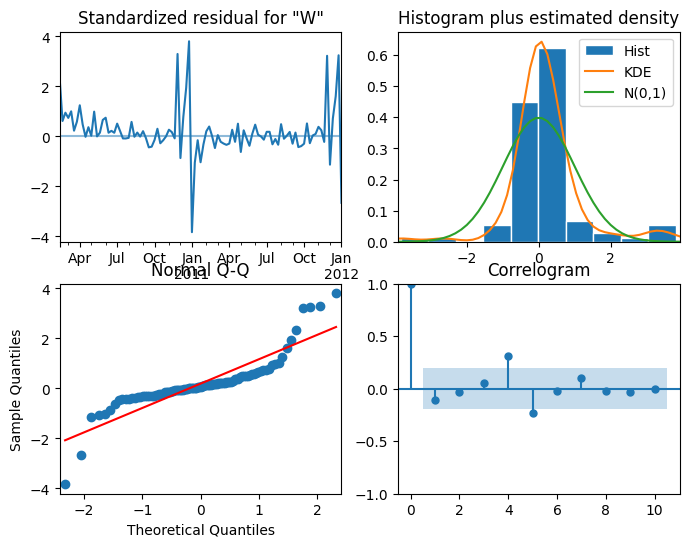

In [74]:
model1.plot_diagnostics()
plt.show()

In [75]:
y_pred1 = model1.predict(100,143)

In [76]:
y_test.head(5)

,Weekly_Sales
Date,
2012-01-08,44955421.95
2012-01-15,42023078.48
2012-01-22,42080996.56
2012-01-29,39834974.67
2012-02-05,46085608.09


In [77]:
y_pred1

2012-01-08    5.216119e+07
2012-01-15    4.780129e+07
2012-01-22    5.194019e+07
2012-01-29    4.867645e+07
2012-02-05    5.157199e+07
2012-02-12    4.919061e+07
2012-02-19    5.124620e+07
2012-02-26    4.952604e+07
2012-03-04    5.099434e+07
2012-03-11    4.975684e+07
2012-03-18    5.080834e+07
2012-03-25    4.991954e+07
2012-04-01    5.067333e+07
2012-04-08    5.003540e+07
2012-04-15    5.057601e+07
2012-04-22    5.011827e+07
2012-04-29    5.050606e+07
2012-05-06    5.017765e+07
2012-05-13    5.045583e+07
2012-05-20    5.022023e+07
2012-05-27    5.041979e+07
2012-06-03    5.025077e+07
2012-06-10    5.039393e+07
2012-06-17    5.027267e+07
2012-06-24    5.037538e+07
2012-07-01    5.028839e+07
2012-07-08    5.036207e+07
2012-07-15    5.029966e+07
2012-07-22    5.035252e+07
2012-07-29    5.030775e+07
2012-08-05    5.034567e+07
2012-08-12    5.031355e+07
2012-08-19    5.034076e+07
2012-08-26    5.031771e+07
2012-09-02    5.033723e+07
2012-09-09    5.032070e+07
2012-09-16    5.033470e+07
2

### AUTO ARIMA

In [78]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.9 MB/s eta 0:00:0000:0100:01


In [79]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(df_weekly_new, start_p=2, start_q=2,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,  max_d = 1 ,        # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=False)

print(model.summary())

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=4844.691, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=4834.617, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=4830.415, Time=0.09 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=4829.672, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=4829.490, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=4830.601, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=4832.420, Time=0.16 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=4834.376, Time=0.23 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=4829.420, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=4831.381, Time=0.09 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=4830.548, Time=0.31 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=4823.303, Time=0.37 sec
 ARIMA(3,0,0)(0,0,0)[1] intercept   : AIC=4831.228, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[1] intercept   : AIC=4833.224, Time=0.11 sec
 ARIMA(3,0,2)(0,0,0)[1] intercept   : AIC=4830.383, Time=0.56 sec

Best mode

In [80]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = weekly_date.Weekly_Sales[:100]
test = weekly_date.Weekly_Sales[100:]

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


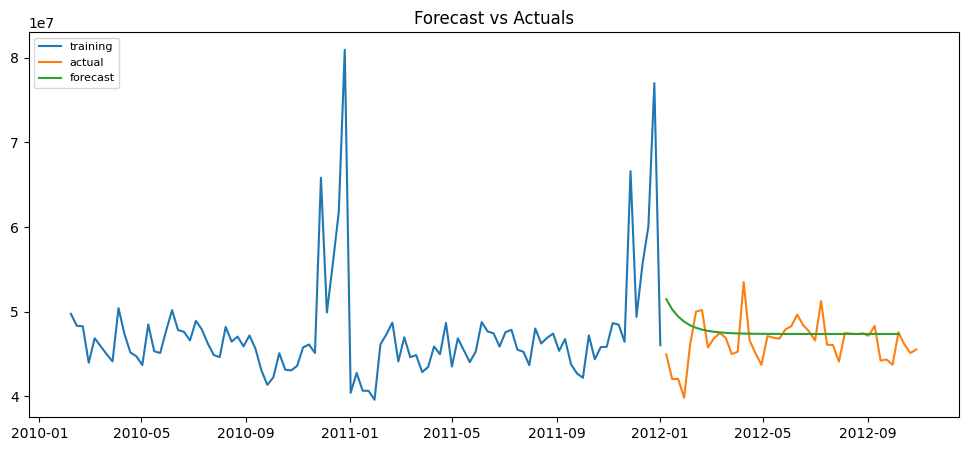

In [81]:
# Build Model
model = sm.tsa.arima.ARIMA(train, order=(1,0,1))  
fitted = model.fit()  

# Forecast
fc= fitted.forecast(steps=40, alpha=0.08)

# Make as pandas series
fc_series = pd.Series(fc)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()